In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# displaying all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [67]:
# reading data
customer_demographic = pd.read_excel('Customer Demographic.xlsx',index_col=0)
customer_address = pd.read_csv('KPMG Customer Address.csv', index_col=0)
transaction = pd.read_csv('KPMG Transaction.csv', index_col=0)

In [68]:
# merging customer_demographic with customer_address
customer_detail = pd.merge(customer_demographic, customer_address, on='customer_id', how='left')

In [69]:
# adding a column to see if the customer has brought vehicle or not
customer_detail['purchased'] = np.where(customer_detail.customer_id.isin(transaction.customer_id), 1, 0)
customer_detail.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,purchased
0,1,Laraine,Medendorp,Female,93,69,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016.0,NSW,Australia,10.0,1
1,2,Eli,Bockman,Male,81,42,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,1
2,3,Arlin,Dearle,Male,61,68,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN,NaN,1
3,4,Talbot,,Male,33,61,Missing,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211.0,QLD,Australia,9.0,1
4,5,Sheila-kathryn,Calton,Female,56,45,Senior Editor,Missing,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448.0,NSW,Australia,4.0,1


In [70]:
customer_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            4000 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   age                                  4000 non-null   int64  
 6   job_title                            4000 non-null   object 
 7   job_industry_category                4000 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

# Data Preprocessing

In [71]:
# getting all columns with missing values after merging customer demographic and customer address table
na_feature = [feature for feature in customer_detail.columns if customer_detail[feature].isna().any()]
na_feature

['address', 'postcode', 'state', 'country', 'property_valuation']

In [72]:
# checking for number of unique values of property valuation to see if it's continuous or not
customer_detail.property_valuation.nunique()

12

- Here property valuation will be treated as a discrete feature.

In [73]:
# handling Null values
for feature in na_feature:
    if feature == 'address':
        customer_detail[feature].fillna('Missing', inplace=True)
    else:
        customer_detail[feature].fillna(customer_detail[feature].mode()[0], inplace=True)

In [74]:
# rechecking for null values
customer_detail.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
purchased                              0
dtype: int64

In [75]:
customer_detail.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,purchased
0,1,Laraine,Medendorp,Female,93,69,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016.0,NSW,Australia,10.0,1
1,2,Eli,Bockman,Male,81,42,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,1
2,3,Arlin,Dearle,Male,61,68,Recruiting Manager,Property,Mass Customer,N,Yes,15,Missing,2170.0,NSW,Australia,9.0,1
3,4,Talbot,,Male,33,61,Missing,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211.0,QLD,Australia,9.0,1
4,5,Sheila-kathryn,Calton,Female,56,45,Senior Editor,Missing,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448.0,NSW,Australia,4.0,1


- We can that the customer with ID 5034 who has made 3 purchases has not provided his/her details.

In [76]:
transaction_detail = pd.merge(customer_detail, transaction, on='customer_id', how='right')
transaction_detail.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,purchased,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit
0,2950,Kristos,Anthony,Male,19.0,67.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,1.0,1,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87
1,3120,Lauree,O'Donnell,Female,89.0,43.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,1.0,2,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55
2,402,Berne,Donegan,Male,9.0,45.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0,1.0,3,37,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61
3,3135,Titus,Worsall,Male,83.0,60.0,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0,1.0,4,88,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36
4,787,Norma,Batrim,Female,29.0,26.0,Missing,Retail,Affluent Customer,N,Yes,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0,1.0,5,78,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82


In [77]:
# checking for Null values
transaction_detail.isna().sum()

customer_id                            0
first_name                             3
last_name                              3
gender                                 3
past_3_years_bike_related_purchases    3
age                                    3
job_title                              3
job_industry_category                  3
wealth_segment                         3
deceased_indicator                     3
owns_car                               3
tenure                                 3
address                                3
postcode                               3
state                                  3
country                                3
property_valuation                     3
purchased                              3
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line    

In [78]:
transaction[~transaction.customer_id.isin(customer_demographic.customer_id)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,104.244984
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,90.100012
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,75.139976


The Null values are obviously related to the customer detail table where customer id is 5034. For analytical purpose let us drop the records.

In [79]:
transaction_detail.drop(index=[8707, 16700, 17468], inplace=True)

In [80]:
# rechecking for Null values
transaction_detail.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
purchased                              0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line    

In [81]:
transaction.shape

(20000, 13)

# Data Analysis

In [82]:
# getting all categorical features
categorical_features = [feature for feature in transaction_detail.columns if transaction_detail[feature].dtype == 'O']
categorical_features

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country',
 'transaction_date',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size']

In [83]:
# getting all discrete numerical features
discrete_numerical = [feature for feature in transaction_detail.columns if transaction_detail[feature].dtype != 'O' 
                      and transaction_detail[feature].nunique() < 25 and 'encoded' not in feature]
discrete_numerical

['tenure', 'property_valuation', 'purchased', 'online_order']

In [84]:
# getting all continuous numerical features
continuous_numerical = [feature for feature in transaction_detail.columns if transaction_detail[feature].dtype != 'O'
                     and transaction_detail[feature].nunique() >= 25]
continuous_numerical

['customer_id',
 'past_3_years_bike_related_purchases',
 'age',
 'postcode',
 'transaction_id',
 'product_id',
 'list_price',
 'standard_cost',
 'Profit']

In [85]:
customer_detail.purchased.value_counts()

1    3493
0     507
Name: purchased, dtype: int64

This is an imbalanced dataset.

In [86]:
transaction_detail = transaction_detail[transaction_detail.order_status == 'Approved']

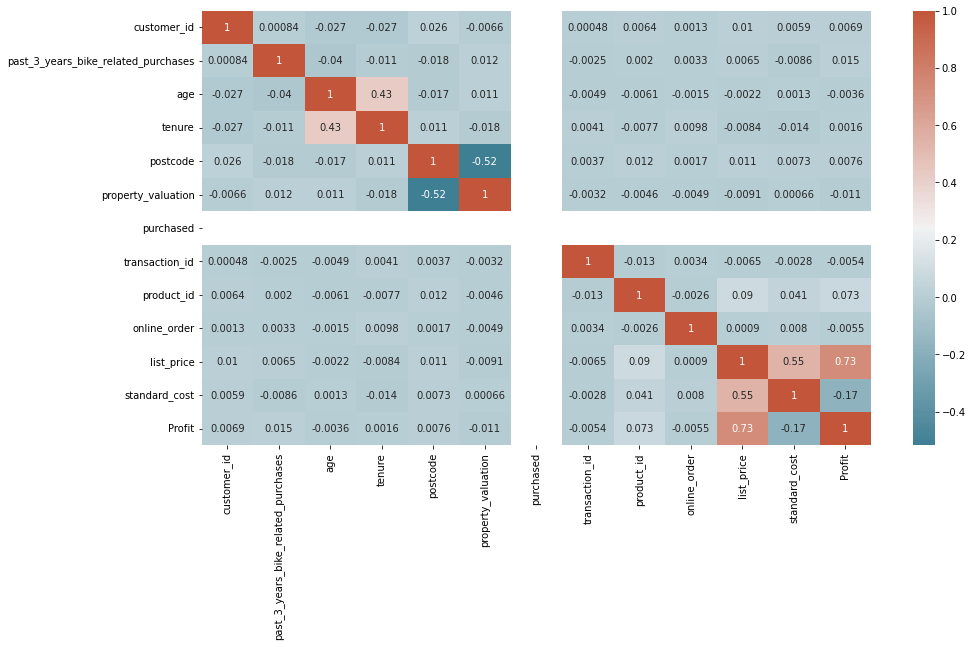

In [87]:
plt.figure(figsize = (15,8))
sns.heatmap(transaction_detail.corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [88]:
customer_detail.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

## Categorical Features

### Gender

In [610]:
# encoding our gender column
customer_detail['gender_encoded'] = np.where(customer_detail.gender == 'Male', 0, 1)

In [611]:
customer_detail.groupby('purchased').gender_encoded.mean()

purchased
0    0.571992
1    0.525909
Name: gender_encoded, dtype: float64

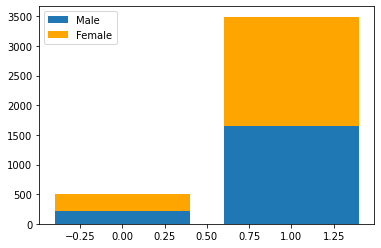

In [612]:
p1 = plt.bar(x=customer_detail.groupby('purchased').gender_encoded.count().index,
        height=customer_detail[customer_detail['gender_encoded'] == 0].groupby('purchased').gender_encoded.count(),
        )

p2 = plt.bar(customer_detail.groupby('purchased').gender_encoded.count().index,
        height=customer_detail[customer_detail['gender_encoded'] == 1].groupby('purchased').gender_encoded.count(),
        bottom=customer_detail[customer_detail['gender_encoded'] == 0].groupby('purchased').gender_encoded.count(),color='orange')

plt.ylabels='Number of people'
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.xticks = [0,1]
plt.show()

gender
Female    0.863168
Male      0.884143
U         0.875000
Name: purchased, dtype: float64 



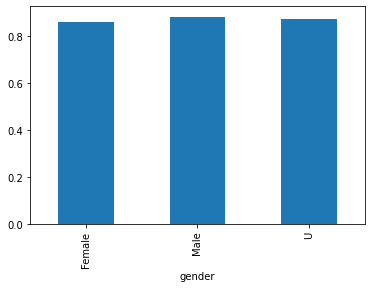

In [613]:
print(customer_detail.groupby('gender').purchased.mean(),'\n')
customer_detail.groupby('gender').purchased.mean().plot.bar()
plt.ylabel ='Ratio of people who purchased the product'
plt.show()

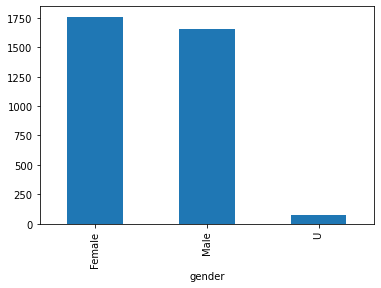

In [614]:
customer_detail.groupby('gender').purchased.sum().plot.bar()
plt.show()

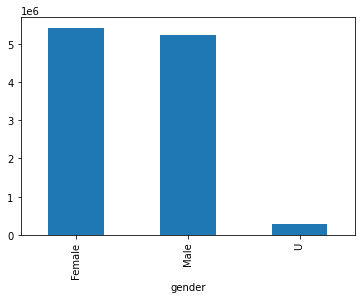

In [615]:
transaction_detail.groupby('gender').Profit.sum().plot.bar()
plt.ylabel = 'Total profit'
plt.show()

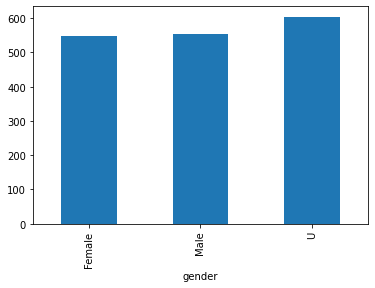

In [616]:
transaction_detail.groupby('gender').Profit.mean().plot.bar()
plt.ylabel = 'Average profit'
plt.show()

- Around 57% of the customers who have not purchased the product are females. 
- At the same time, around 52% of the customers who have purchased the products are females.
- More number of females have purchased the product when compared with males.
- Since it's an imbalanced dataset, it's no surprise that more than 85% of the people in the database have purchased the product.
- Female customers accounts for the most profit earned by the company closely followed by male customers. However, on an average profit earned by the male customers is higher when compared to that of female customers.

### Job title

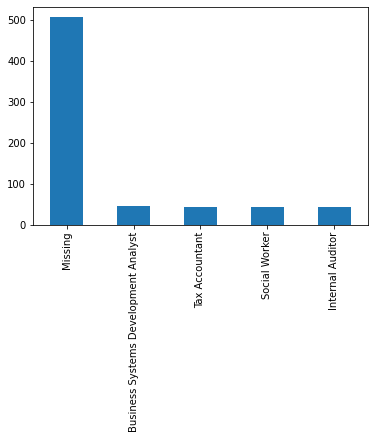

In [617]:
customer_detail.job_title.value_counts().nlargest().plot.bar()
plt.show()

job_title
Account Coordinator           25
Account Executive             30
Account Representative I       9
Account Representative II      4
Account Representative III     6
                              ..
Web Designer IV               10
Web Developer I                6
Web Developer II               6
Web Developer III              8
Web Developer IV               3
Name: purchased, Length: 196, dtype: int32 



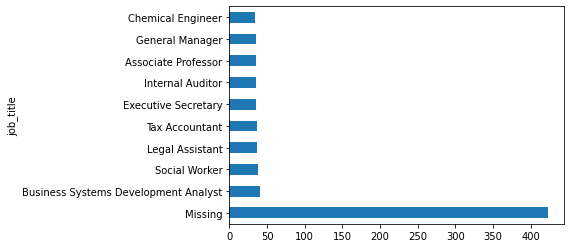

In [618]:
print(customer_detail.groupby('job_title').purchased.sum(), '\n')
customer_detail.groupby('job_title').purchased.sum().nlargest(10).plot.barh()
plt.ylabel='Number of people who purchased'
plt.show()

job_title
Account Representative II      1.0
Account Representative III     1.0
Account Representative IV      1.0
Accountant IV                  1.0
Accounting Assistant II        1.0
Administrative Assistant II    1.0
Automation Specialist I        1.0
Automation Specialist II       1.0
Automation Specialist III      1.0
Budget/Accounting Analyst I    1.0
Name: purchased, dtype: float64 



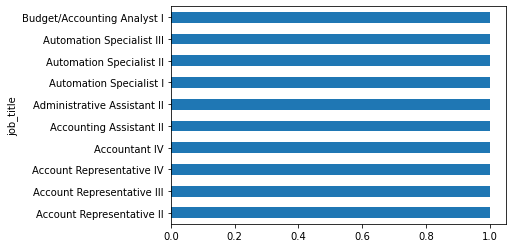

In [619]:
print(customer_detail.groupby('job_title').purchased.mean().nlargest(10), '\n')
customer_detail.groupby('job_title').purchased.mean().nlargest(10).plot.barh()
plt.ylabel='Ratio of people who purchased'
plt.show()

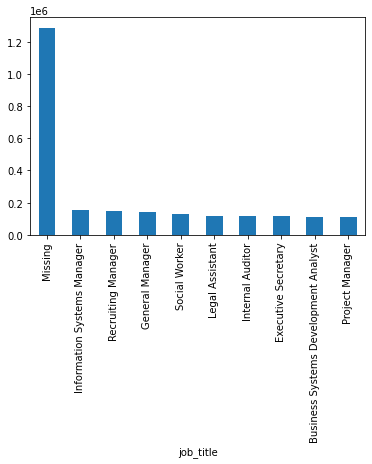

In [620]:
transaction_detail.groupby('job_title').Profit.sum().nlargest(10).plot.bar()
plt.ylabel = 'Total profit'
plt.show()

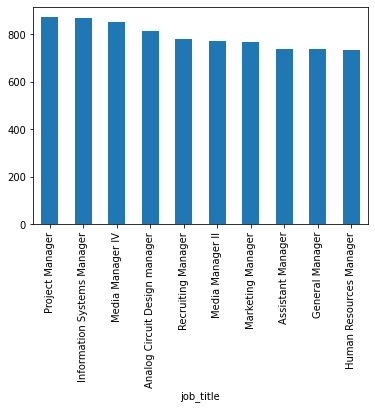

In [621]:
transaction_detail.groupby('job_title').Profit.mean().nlargest(10).plot.bar()
plt.ylabel = 'Average profit'
plt.show()

- Most of the customers who purchased the product have not specified their job title.
- Among those who have specified their role, most customers are BDA and Social Worker however that is due to their larger populaton share. 
- Information System Managers contribute most to the company's profit.
- Average profit earned is most from Project Managers and Information System Managers.

### Job Industry Category

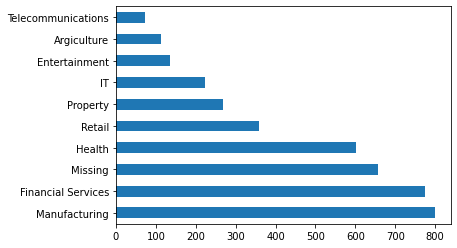

In [622]:
customer_detail.job_industry_category.value_counts().plot.barh()
plt.show()

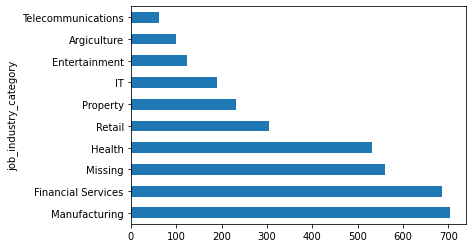

In [623]:
customer_detail.groupby('job_industry_category').purchased.sum().nlargest(10).plot.barh()
plt.ylabel='Number of people who purchased'
plt.show()

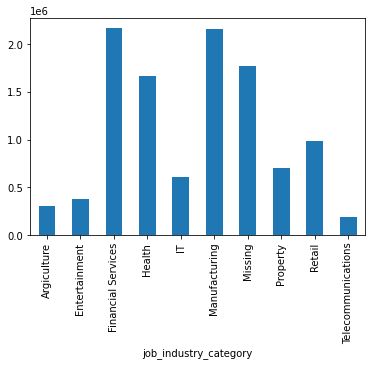

In [624]:
transaction_detail.groupby('job_industry_category').Profit.sum().plot.bar()
plt.ylabel = 'Total profit'
plt.show()

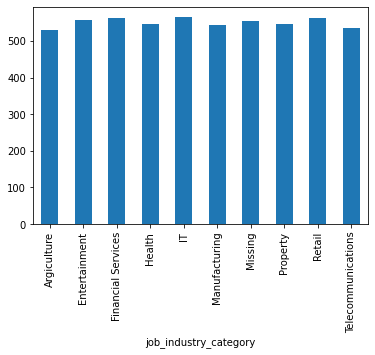

In [625]:
transaction_detail.groupby('job_industry_category').Profit.mean().plot.bar()
plt.ylabel = 'Average profit'
plt.show()

- People from Maufacturing account for more number of purchases than any other sector. It is closely followed by Financial Servies and Health sector. It is due to higher population from these sectors.
- Customers from Financial Services and Manufacturing contribute most towards the total profit.
- However the average profit is almost same for all the industry.

### Wealth Segment

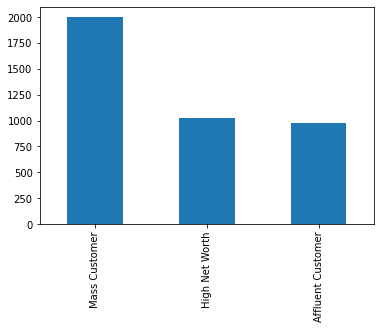

In [626]:
# number of customers in each segment
customer_detail.wealth_segment.value_counts().plot.bar()
plt.show()

wealth_segment
Affluent Customer     851
High Net Worth        895
Mass Customer        1747
Name: purchased, dtype: int32 



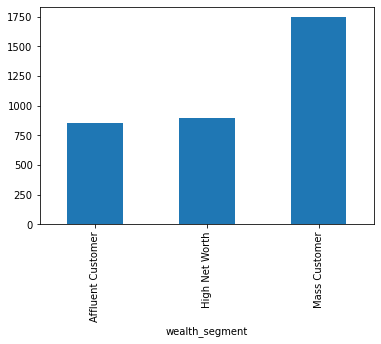

In [627]:
# total number of people from each segment who purchased the product
customer_detail.groupby('wealth_segment').purchased.sum().plot.bar()
print(customer_detail.groupby('wealth_segment').purchased.sum(), '\n')
plt.xlabel='Number of people who purchased'
plt.show()

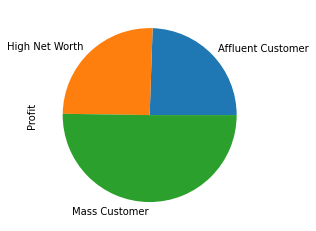

In [628]:
transaction_detail.groupby('wealth_segment').Profit.sum().plot.pie()
plt.ylabel = 'Total profit'
plt.show()

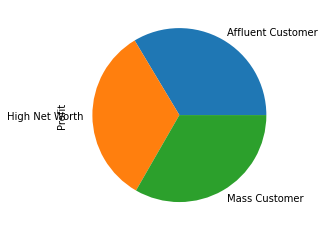

In [629]:
transaction_detail.groupby('wealth_segment').Profit.mean().plot.pie()
plt.ylabel = 'Average profit'
plt.show()

- Mass Customers account for most number of purchases owing to their larger population share.
- Mass customers contribute most towards the Total profit earned by the company. However average profit earned is a tad higher from customers belonging to High Net Worth class .

### Owns Car

In [630]:
print('People owning car: \n{}'.format(customer_detail.owns_car.value_counts()))

People owning car: 
Yes    2024
No     1976
Name: owns_car, dtype: int64


owns_car
No     1723
Yes    1770
Name: purchased, dtype: int32 



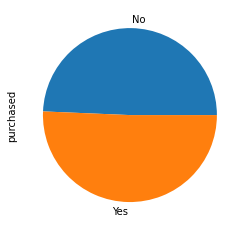

In [631]:
# total number of people based on car ownership who purchased the product
customer_detail.groupby('owns_car').purchased.sum().plot.pie()
print(customer_detail.groupby('owns_car').purchased.sum(), '\n')
plt.xlabel='Number of people who purchased'
plt.show()

owns_car
No     5361646.99
Yes    5584803.28
Name: Profit, dtype: float64 



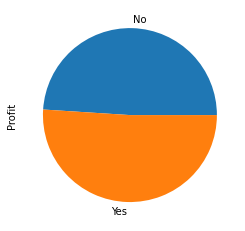

In [632]:
print(transaction_detail.groupby('owns_car').Profit.sum(), '\n')
transaction_detail.groupby('owns_car').Profit.sum().plot.pie()
plt.ylabel = 'Total profit'
plt.show()

owns_car
No     545.270720
Yes    559.319307
Name: Profit, dtype: float64 



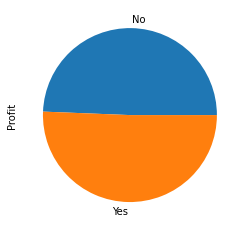

In [633]:
print(transaction_detail.groupby('owns_car').Profit.mean(), '\n')
transaction_detail.groupby('owns_car').Profit.mean().plot.pie()
plt.ylabel = 'Average profit'
plt.show()

- Car ownership doesn't influence the purchase of the product since we have almost same number and ratio of sale irrespective of car ownership.
- Car ownership also doesn't impact the profit earned by the company as well.

### State

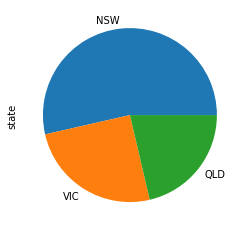

In [634]:
transaction_detail.state.value_counts().plot.pie()
plt.show()

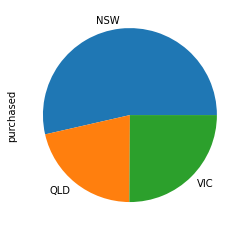

In [635]:
transaction_detail.groupby('state').purchased.sum().plot.pie()
plt.show()

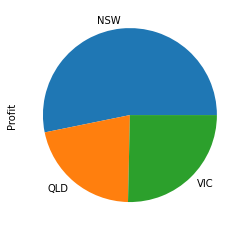

In [636]:
transaction_detail.groupby('state').Profit.sum().plot.pie()
plt.show()

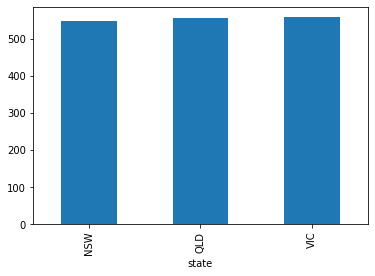

In [637]:
transaction_detail.groupby('state').Profit.mean().plot.bar()
plt.show()

- Owing to larger number of customers from NSW, NSW contibutes most towards number of orders and total profit.
- Average profit remains same from all three states.

### Brand

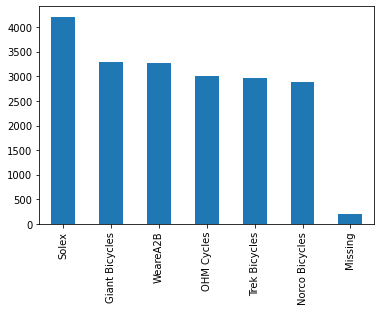

In [638]:
transaction_detail.brand.value_counts().plot.bar()
plt.show()

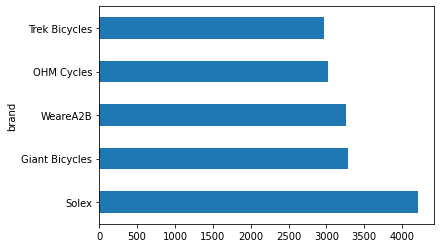

In [639]:
transaction_detail.groupby('brand').purchased.sum().nlargest().plot.barh()
plt.show()

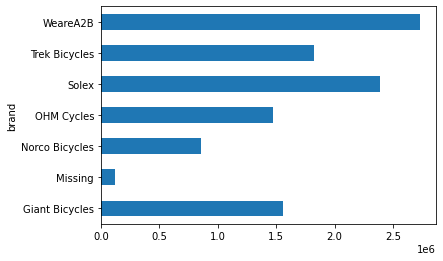

In [640]:
transaction_detail.groupby('brand').Profit.sum().plot.barh()
plt.show()

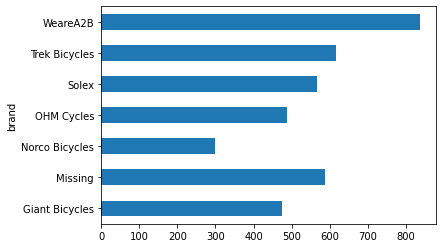

In [641]:
transaction_detail.groupby('brand').Profit.mean().plot.barh()
plt.show()

In [642]:
transaction_detail.groupby('brand').Profit.max().nlargest()

brand
Trek Bicycles    1702.55
WeareA2B         1660.88
Solex            1612.25
OHM Cycles       1592.19
Missing          1578.49
Name: Profit, dtype: float64

- Solex is the most popular brand followed by Giant Bicycles and WeareA2B is at the top..
- However in terms of total profit as well as average profit, WeareA2B is at the top.
- This is due to a product in WeareA2B which has higher profit margin that any product of Solex.

### Product Line

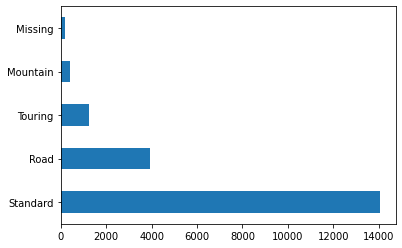

In [643]:
transaction_detail.product_line.value_counts().plot.barh()
plt.show()

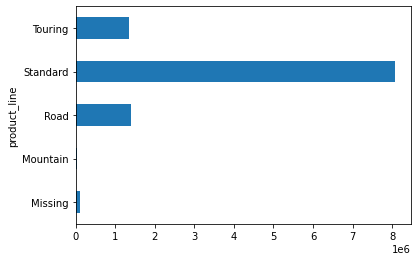

In [644]:
transaction_detail.groupby('product_line').Profit.sum().plot.barh()
plt.show()

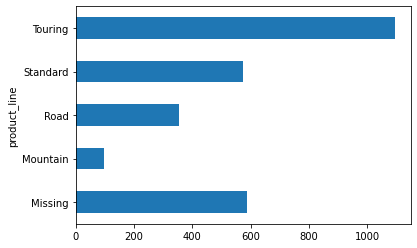

In [645]:
transaction_detail.groupby('product_line').Profit.mean().plot.barh()
plt.show()

- Standard products are the most popular choices and most of the company's profit is generated by them.
- However on an average, touring line products generate more revenue.

### Product Class

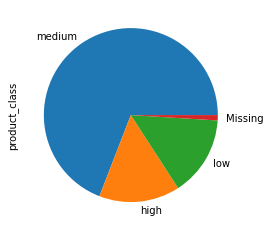

In [646]:
transaction_detail.product_class.value_counts().plot.pie()
plt.show()

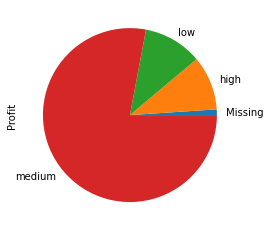

In [647]:
transaction_detail.groupby('product_class').Profit.sum().plot.pie()
plt.show()

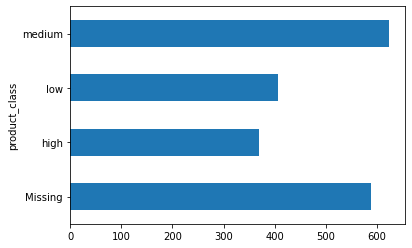

In [648]:
transaction_detail.groupby('product_class').Profit.mean().plot.barh()
plt.show()

- Medium class products are most pouplar among the customers and they generate the most profit for the company.
- Average profit is also higher for medium class products than that of any other classes.

### Product Size

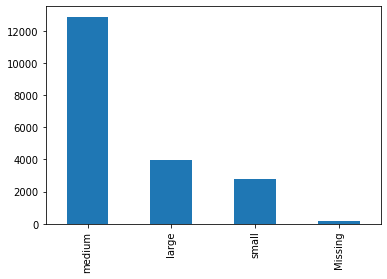

In [649]:
transaction_detail.product_size.value_counts().plot.bar()
plt.show()

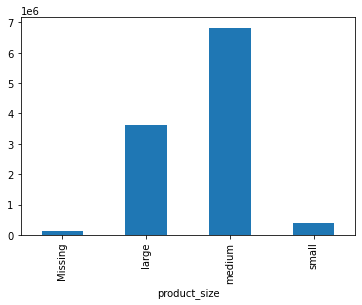

In [650]:
transaction_detail.groupby('product_size').Profit.sum().plot.bar()
plt.show()

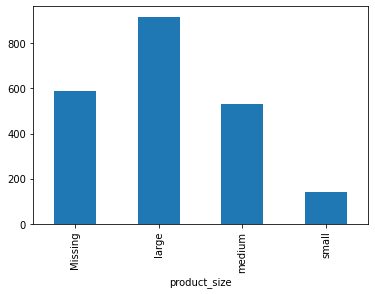

In [651]:
transaction_detail.groupby('product_size').Profit.mean().plot.bar()
plt.show()

- Medium sized products make up for most of our sale. They are also responsible for generating the most profit.
- In terms of average profit however, large sized products are in the lead.

## Temporal Features

In [652]:
transaction_detail['quarter'] = pd.to_datetime(transaction_detail.transaction_date).dt.quarter

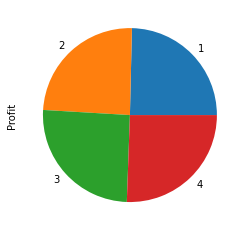

In [653]:
transaction_detail.groupby('quarter').Profit.sum().plot.pie()
plt.show()

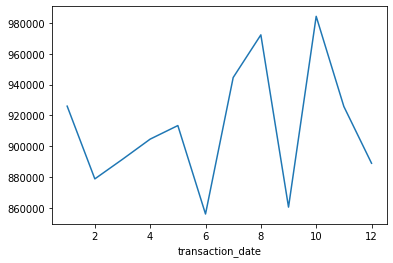

In [654]:
# plt.figure(figsize = (15,7))
transaction_detail.groupby(pd.to_datetime(transaction_detail.transaction_date).dt.month).Profit.sum().plot()
plt.show()

- Profit is almost same in each quarter.

## Dicrete Numerical Features

### Tenure

In [655]:
transaction_detail.tenure.value_counts()

7.0     1183
5.0     1090
11.0    1083
12.0    1054
16.0    1053
8.0     1024
14.0    1006
9.0      985
17.0     982
10.0     970
13.0     967
6.0      947
18.0     946
4.0      921
15.0     904
1.0      872
19.0     831
3.0      810
2.0      733
20.0     491
0.0      444
21.0     271
22.0     251
Name: tenure, dtype: int64

In [656]:
# creating new column to see if customer has any previous loan or not
transaction_detail['tenure_encoded'] = np.where(transaction_detail.tenure > 0, 1, transaction_detail.tenure)

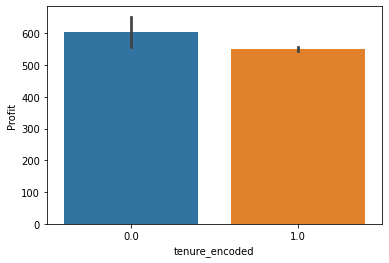

In [657]:
sns.barplot(x='tenure_encoded', y='Profit', data=transaction_detail)
plt.show()

- Average profit is higher from customers who have no prior loans.

###  Property Valuation

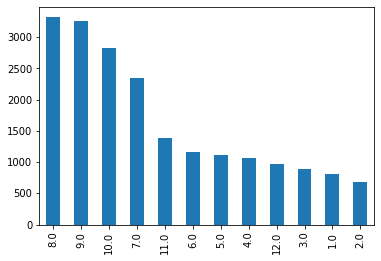

In [658]:
transaction_detail.property_valuation.value_counts().plot.bar()
plt.show()

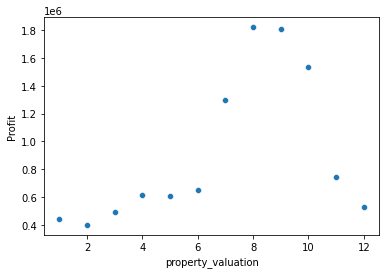

In [659]:
sns.scatterplot(x=transaction_detail.groupby('property_valuation').Profit.sum().index, 
                y=transaction_detail.groupby('property_valuation').Profit.sum())
plt.show()

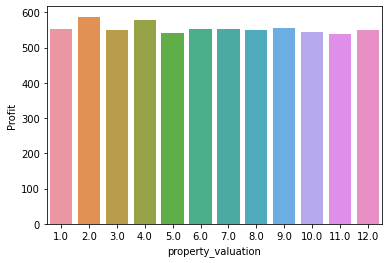

In [660]:
sns.barplot(x=transaction_detail.groupby('property_valuation').Profit.sum().index, 
                y=transaction_detail.groupby('property_valuation').Profit.mean())
plt.show()

- Observing closely we can see that property valuation of customers doesn't affect the profit of the comapny.

### Online Order

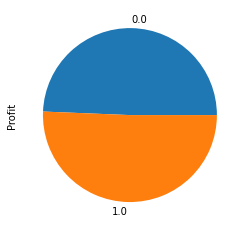

In [661]:
transaction_detail.groupby('online_order').Profit.sum().plot.pie()
plt.show()

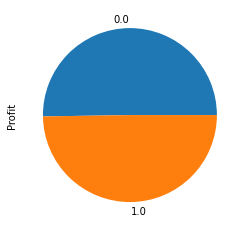

In [662]:
transaction_detail.groupby('online_order').Profit.mean().plot.pie()
plt.show()

- We can see almost same profit from both offline as well as online order.

## Continuous Features

#### Age

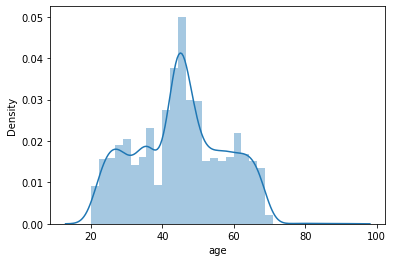

In [663]:
# distribution of age
sns.distplot(customer_detail.age)
plt.show()

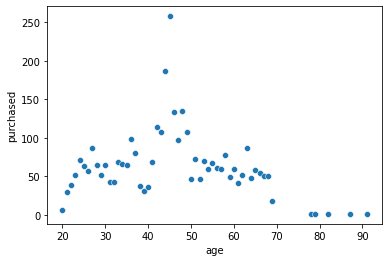

In [664]:
sns.scatterplot(x=customer_detail.groupby('age').purchased.sum().index, y=customer_detail.groupby('age').purchased.sum())
plt.ylabel = 'Number of people purchased'
plt.show()

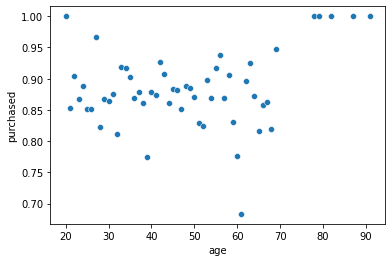

In [665]:
sns.scatterplot(x=customer_detail.groupby('age').purchased.sum().index, y=customer_detail.groupby('age').purchased.mean())
plt.ylabel = 'Ratio of people purchased'
plt.show()

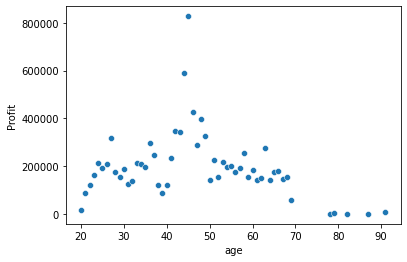

In [666]:
# visualising total profit vs age 
sns.scatterplot(x = transaction_detail.groupby('age').Profit.sum().index, y = transaction_detail.groupby('age').Profit.sum())
plt.ylabel ='Total Sales'
plt.show()

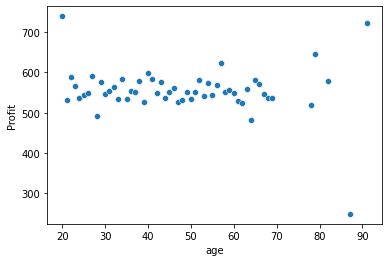

In [667]:
# visualising average profit vs age 
sns.scatterplot(x = transaction_detail.groupby('age').Profit.sum().index, y = transaction_detail.groupby('age').Profit.mean())
plt.ylabel ='Total Sales'
plt.show()

- Since most of the customers are between 40 and 50 years old, it's not surprising that most of the orders for the company comes from the same age group. Also the total profit earned is higher for the same age group.
- Average profit earned from any age group is almost same.

In [668]:
transaction_detail.to_excel('Transaction Detail.xlsx')

## RFM Table

In [669]:
# adding a column to show time since last order
transaction_detail['days_ago'] = (pd.to_datetime(transaction_detail.transaction_date).max() - 
                                  pd.to_datetime(transaction_detail.transaction_date)).astype(str).\
                                    str.strip(' days').astype(int)

In [670]:
# creating rfm table
rfm_table = transaction_detail.groupby('customer_id').agg({'days_ago': lambda x: x.min(),
                                                'customer_id': lambda x: len(x),
                                                'Profit': lambda x: x.sum()})

In [671]:
rfm_table.rename(columns={'days_ago':'recency', 'customer_id':'frequency', 'Profit':'profit'}, inplace=True)

In [672]:
rfm_table.head()

,recency,frequency,profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [673]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles.head()

,recency,frequency,profit
0.25,17.0,4.0,1857.5325
0.50,44.0,6.0,2862.3700
0.75,86.0,7.0,4212.9475


In [674]:
def ROneHotEncoder(x, col, quantiles):
    if x < quantiles.loc[0.25,col]:
        return 1
    if x < quantiles.loc[0.5,col]:
        return 2
    if x < quantiles.loc[0.75,col]:
        return 3
    else:
        return 4

def MFOneHotEncoder(x, col, quantiles):
    if x < quantiles.loc[0.25,col]:
        return 4
    if x < quantiles.loc[0.5,col]:
        return 3
    if x < quantiles.loc[0.75,col]:
        return 2
    else:
        return 1 

In [675]:
rfm_table['r_score'] = rfm_table.recency.apply(ROneHotEncoder, args=('recency', quantiles))
rfm_table['f_score'] = rfm_table.frequency.apply(MFOneHotEncoder, args=('frequency', quantiles))
rfm_table['m_score'] = rfm_table.profit.apply(MFOneHotEncoder, args=('profit', quantiles))
rfm_table.head()

,recency,frequency,profit,r_score,f_score,m_score
customer_id,,,,,,
1,7,11,3018.09,1,1,2
2,128,3,2226.26,4,4,3
3,102,8,3362.81,4,1,2
4,195,2,220.57,4,4,4
5,16,6,2394.94,1,2,3


In [676]:
rfm_table['rfm_class'] = rfm_table.r_score * 100 + rfm_table.f_score * 10 + rfm_table.m_score
rfm_table.head()

,recency,frequency,profit,r_score,f_score,m_score,rfm_class
customer_id,,,,,,,
1,7,11,3018.09,1,1,2,112
2,128,3,2226.26,4,4,3,443
3,102,8,3362.81,4,1,2,412
4,195,2,220.57,4,4,4,444
5,16,6,2394.94,1,2,3,123


In [677]:
rfm_table.quantile(q=[0.25,0.5,0.75])

,recency,frequency,profit,r_score,f_score,m_score,rfm_class
0.25,17.0,4.0,1857.5325,2.0,1.0,1.75,211.0
0.50,44.0,6.0,2862.3700,3.0,2.0,2.50,311.0
0.75,86.0,7.0,4212.9475,4.0,3.0,3.25,411.0


In [678]:
print(rfm_table.rfm_class.min(), '\n')
print(rfm_table.rfm_class.quantile(0.25))

111 

211.0


In [679]:
def RFMClassOneHotEncoder(x):
    if x < rfm_table.rfm_class.quantile(0.1):
        return 'Gold'
    elif x < rfm_table.rfm_class.quantile(0.25):
        return 'Silver'
    elif x < rfm_table.rfm_class.quantile(0.55):
        return 'Bronze'
    else:
        return 'Basic'

In [680]:
rfm_table['customer_badge'] = rfm_table.rfm_class.apply(RFMClassOneHotEncoder)

In [681]:
rfm_table.head()

,recency,frequency,profit,r_score,f_score,m_score,rfm_class,customer_badge
customer_id,,,,,,,,
1,7,11,3018.09,1,1,2,112,Gold
2,128,3,2226.26,4,4,3,443,Basic
3,102,8,3362.81,4,1,2,412,Basic
4,195,2,220.57,4,4,4,444,Basic
5,16,6,2394.94,1,2,3,123,Silver


In [682]:
rfm_table.customer_badge.value_counts()

Basic     1596
Bronze    1066
Silver     518
Gold       312
Name: customer_badge, dtype: int64

In [683]:
transaction_detail = pd.merge(transaction_detail, rfm_table, on='customer_id')

In [684]:
transaction_detail.groupby('customer_badge').customer_id.count()

customer_badge
Basic     7555
Bronze    6955
Gold      2701
Silver    2607
Name: customer_id, dtype: int64

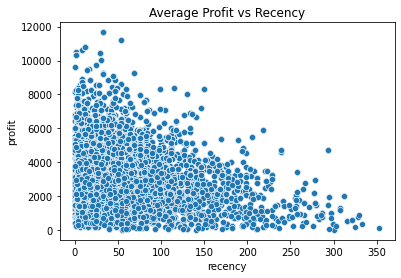

In [685]:
sns.scatterplot(x='recency', y='profit', data=transaction_detail)
plt.title('Average Profit vs Recency')
plt.show()

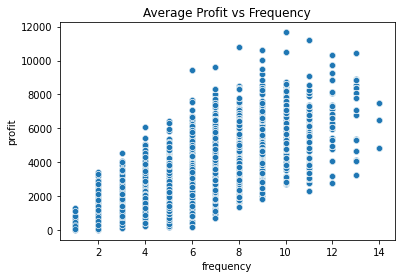

In [686]:
sns.scatterplot(x='frequency', y='profit', data=transaction_detail)
plt.title('Average Profit vs Frequency')
plt.show()

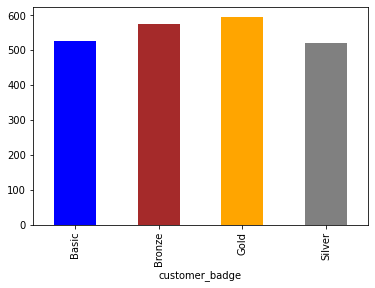

In [687]:
transaction_detail.groupby('customer_badge').Profit.mean().plot.bar(color=['blue', 'brown', 'orange', 'grey'])
plt.show()

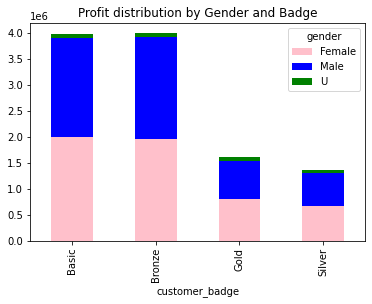

In [688]:
transaction_detail.groupby(['customer_badge','gender']).Profit.sum().to_frame().reset_index('gender')\
        .pivot(columns='gender',values='Profit')\
        .plot(kind='bar', stacked=True, color=['Pink', 'Blue', 'Green'])
plt.title('Profit distribution by Gender and Badge')
plt.show()

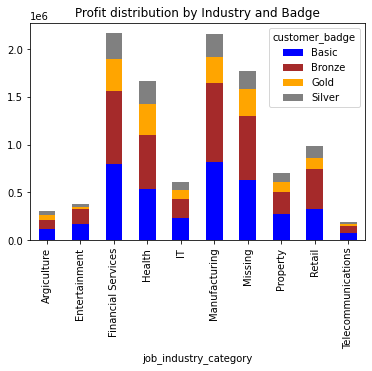

In [689]:
transaction_detail.groupby(['customer_badge','job_industry_category']).Profit.sum().to_frame().reset_index('customer_badge')\
        .pivot(columns='customer_badge',values='Profit')\
        .plot(kind='bar', stacked=True, color=['blue', 'brown', 'orange', 'grey'])
plt.title('Profit distribution by Industry and Badge')
plt.show()

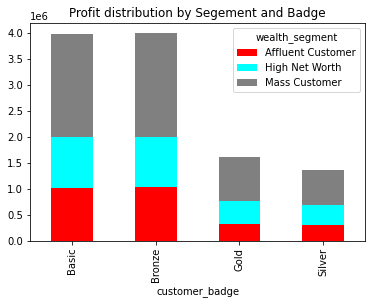

In [690]:
transaction_detail.groupby(['customer_badge','wealth_segment']).Profit.sum().to_frame().reset_index('wealth_segment')\
        .pivot(columns='wealth_segment',values='Profit')\
        .plot(kind='bar', stacked=True, color=['red', 'cyan', 'grey'])
plt.title('Profit distribution by Segement and Badge')
plt.show()

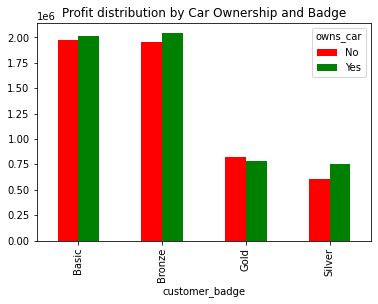

In [691]:
transaction_detail.groupby(['customer_badge','owns_car']).Profit.sum().to_frame().reset_index('owns_car')\
        .pivot(columns='owns_car',values='Profit')\
        .plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Profit distribution by Car Ownership and Badge')
plt.show()

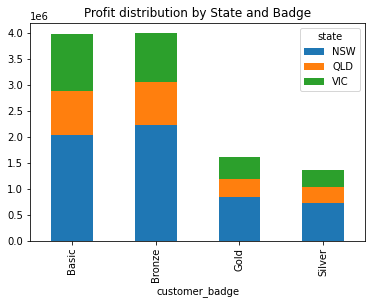

In [692]:
transaction_detail.groupby(['customer_badge','state']).Profit.sum().to_frame().reset_index('state')\
        .pivot(columns='state',values='Profit')\
        .plot(kind='bar', stacked=True)
plt.title('Profit distribution by State and Badge')
plt.show()

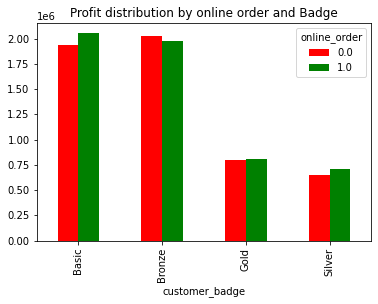

In [693]:
transaction_detail.groupby(['customer_badge','online_order']).Profit.sum().to_frame().reset_index('online_order')\
        .pivot(columns='online_order',values='Profit')\
        .plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Profit distribution by online order and Badge')
plt.show()

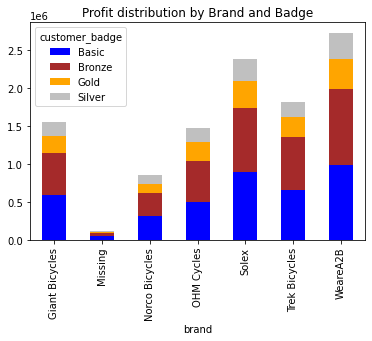

In [694]:
transaction_detail.groupby(['customer_badge','brand']).Profit.sum().unstack(level=0)\
        .plot(kind='bar', stacked=True, color=['blue','brown','orange','silver'])
plt.title('Profit distribution by Brand and Badge')
plt.show()

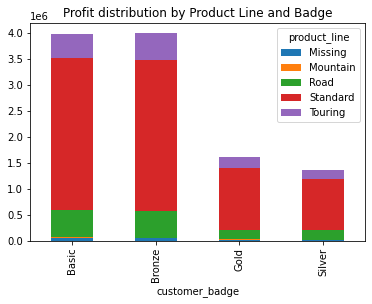

In [695]:
transaction_detail.groupby(['customer_badge','product_line']).Profit.sum().unstack()\
        .plot(kind='bar', stacked=True)
plt.title('Profit distribution by Product Line and Badge')
plt.show()

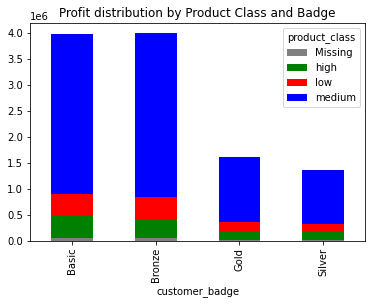

In [696]:
transaction_detail.groupby(['customer_badge','product_class']).Profit.sum().unstack()\
        .plot(kind='bar', stacked=True, color=['grey','green','red','blue'])
plt.title('Profit distribution by Product Class and Badge')
plt.show()

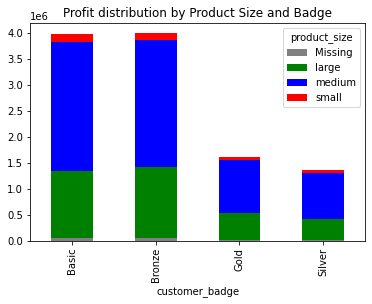

In [697]:
transaction_detail.groupby(['customer_badge','product_size']).Profit.sum().unstack()\
        .plot(kind='bar', stacked=True, color=['grey','green','blue','red'])
plt.title('Profit distribution by Product Size and Badge')
plt.show()